In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from myLibraries.queries import * 
from myLibraries.events import *
from myLibraries.rawData_queries import *

# **infos of authors who started in 2017**

In [3]:
# Authors who started in 2017 ordered number of collaborations
df = get_collabs_by_hole_size(28, 2017)
print(df.sort_values('2018', ascending=False).head(20))

                ID  2017  2018
2048   57195185389   108   108
9430    7004365626   104   105
10599  24342850300   102   102
5748   56968574700     8    95
8847    6603188175    79    79
5167   57193575006     0    77
9521   56213106400    56    76
4989   57190231858     0    76
4909   57188547921     0    76
3562   55786627900     0    76
9530    8700280300    76    76
6601   16032781000    74    74
1678    6507335623    71    72
10476  57191632579    64    64
4013    7202056469    63    64
5824    6507583588    60    63
5492   15021486400     0    63
10227  55798314000     0    63
8830   57193864821    62    62
5785    7401766181    62    62


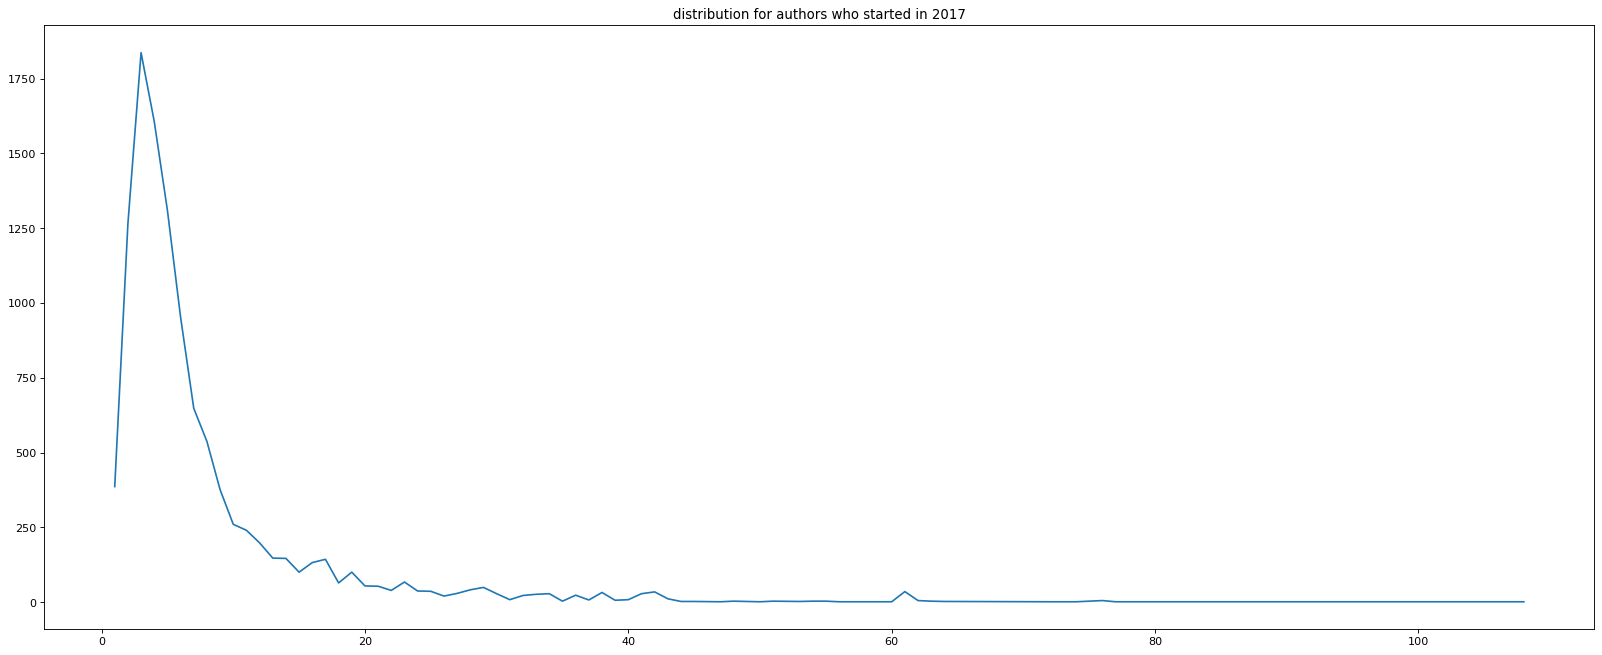

#collabs 	#authors_associated
-------- 	 ---------
1 		 386
2 		 1265
3 		 1837
4 		 1607
5 		 1310
6 		 953
7 		 648
8 		 537
9 		 376
10 		 260
11 		 240
12 		 198
13 		 147
14 		 146
15 		 100
16 		 132
17 		 143
18 		 64
19 		 100
20 		 54
21 		 53
22 		 39
23 		 67
24 		 37
25 		 36
26 		 20
27 		 29
28 		 41
29 		 49
30 		 28
31 		 8
32 		 22
33 		 26
34 		 28
35 		 3
36 		 23
37 		 7
38 		 32
39 		 6
40 		 8
41 		 28
42 		 34
43 		 11
44 		 2
45 		 2
47 		 1
48 		 3
50 		 1
51 		 3
53 		 2
54 		 3
55 		 3
56 		 1
57 		 1
59 		 1
60 		 1
61 		 35
62 		 5
63 		 3
64 		 2
72 		 1
74 		 1
76 		 5
77 		 1
79 		 1
95 		 1
102 		 1
105 		 1
108 		 1

The average number of collaborations in 2017 is  6.507219251336898


In [11]:
# Distribution on collaboration 
plt.figure(figsize=(25, 10), dpi=80)
plt.title("distribution for authors who started in 2017")
x = list(set(list(df["2018"]))) # number of collaboration 
y =  []
for i in x:
    y.append(len(df[df["2018"]==i])) # number of authors for the given number of collaboration

plt.plot(x,y)
plt.show()

print("#collabs", "\t#authors_associated")
print("--------", "\t", "---------")

for i,j in zip(x,y):
    print(i,"\t\t", j)
    
print("\nThe average number of collaborations in 2017 is ", np.average(df["2017"], axis=0))

In [12]:
# names
names_df = get_COMP_names_by_start_year(2017)
names_df

,ID,name,start_year
22,55719005700,Seoyoung Kim,2017
52,57193437031,Nilton M. Souza,2017
64,57201405140,Oliver Ferdinand,2017
103,57193831201,Yasunori Takahara,2017
108,57190680369,Simon Ware,2017
...,...,...,...
232780,57196003513,Carl Bootland,2017
232815,57191333116,Jérôme Perrin,2017
232819,57202301997,Miriam Jimenez,2017
232832,57201401290,Karen Godary Dejean,2017


# **ending year**

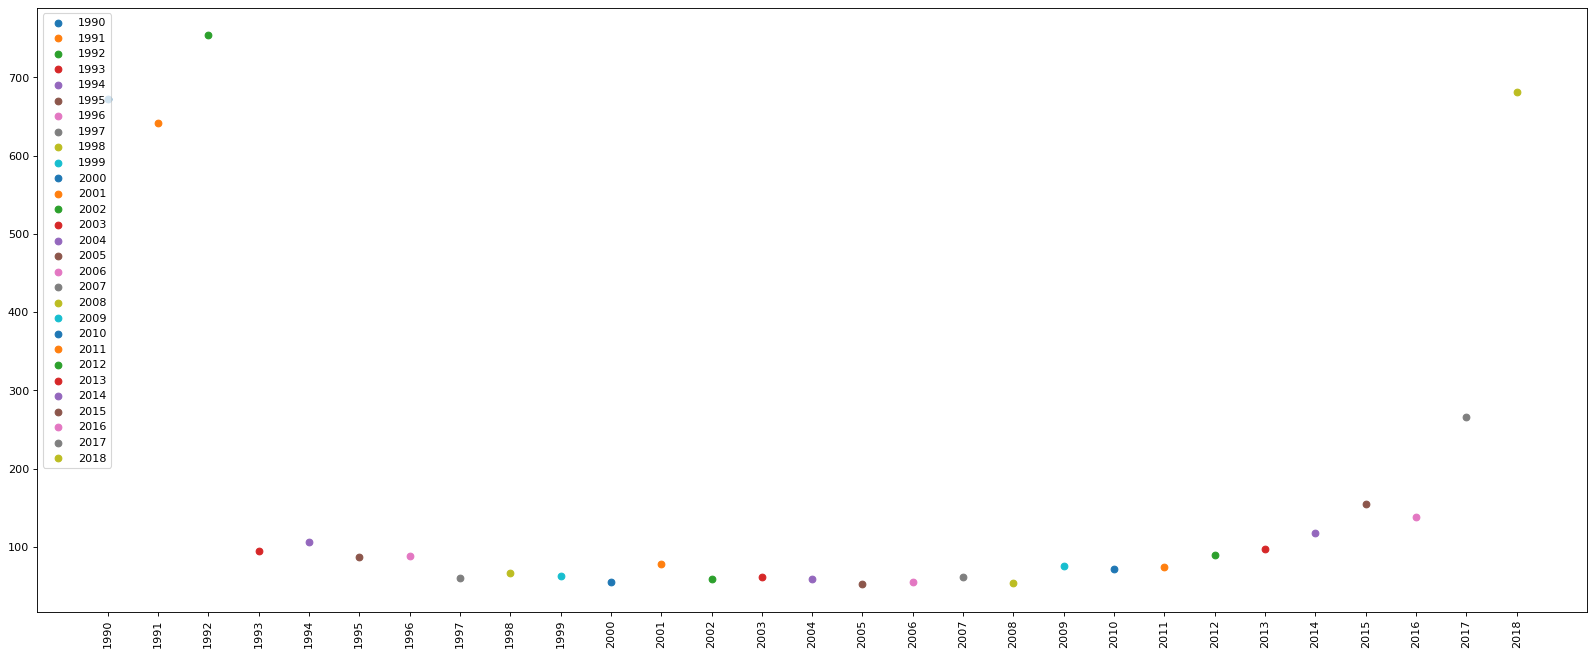

In [9]:
# all
YEARS = get_int_years_event()
plt.figure(figsize=(25, 10), dpi=80)

data = get_starting_and_ending_years()
data = data[data.start_year.isin([1990, 1991, 1992])]
dist = {}
for y in YEARS:
    dist[y] = len(data[data["end_year"] == y])
    plt.scatter(y, dist[y])

plt.xticks(rotation='vertical')    
plt.legend(YEARS, loc='upper left')
plt.xticks(YEARS)
plt.show()
    
    
# HS1

# HS2

# HS3

# Starting collaboration year VS starting publication year

get those authgors who have started collaborations before publications 

In [26]:
## Find the starting collaboration year for each author
def get_start_Y(aut):
    YEARS = [str(year) for year in range(1990,2019)]    
    for y in YEARS:
        val = aut[y].values[0]
        if(val != 0):
            return y
        
# add starting year to each row of df, taking the start year from the collaboration or publication dataset
def add_start_collab_y(df, coll_or_pub_df):
    df["start_year"] = [0 for i in range(len(df))]
    i = 0
    for id in df["ID"]:
        
        if(i%500 == 0):
            print("done", i, "on", len(df), end='\r')
        i+=1
        
        aut = df.loc[df["ID"] == id]
        df.loc[df.ID == id, "start_year"] = get_start_Y(coll_or_pub_df.loc[coll_or_pub_df["ID"] == id])
    return df

collab_df = get_all_collabs()
df = add_start_collab_y(collab_df, collab_df)

In [36]:
YEARS = [str(year) for year in range(1990,2019)]   
collab_years = df[["start_year"]]

In [101]:
data = get_starting_years() # starting publication years
data["start_coll_year"] = collab_years
data["start_coll_year"] = data["start_coll_year"].fillna(100000) # big number for fun
data["start_coll_year"] = data["start_coll_year"].astype(int)
data = pd.merge(data, get_all_COMP_names())
data

,ID,start_year,start_coll_year,name
0,8958327900,2000,100000,Regina Gusmão
1,6508297663,1995,2005,Orfan Zahraa
2,7004267341,2008,2008,Diego Mateo
3,8642393600,2015,2015,Jane Goudge
4,55873955900,2014,2015,A. Diebold
...,...,...,...,...
232833,6507630481,2002,2002,A. Cordat
232834,24577815500,2003,2005,Hugues Richard
232835,57195243976,2017,2010,Catherine Cleder
232836,35328962100,2010,2014,Mohamed Addam


In [106]:
ahmed_samets_idxs = np.where((data['start_year'] > data['start_coll_year']))[0]
ahmed_samets_idxs

array([    22,     47,     61, ..., 232815, 232830, 232835])

In [107]:
data[data.index.isin(ahmed_samets_idxs)]

,ID,start_year,start_coll_year,name
22,55719005700,2017,2015,Seoyoung Kim
47,12240297000,2005,2004,Jean Denis Laffitte
61,55885827600,2007,2006,William Christmas
65,35226280500,2015,2012,Hanene Guesmi
81,57205054402,1997,1994,Ioannis Parissis
...,...,...,...,...
232792,56102356500,2015,2014,Rudi Leroy
232807,35085798200,2009,2007,Roland Alonso
232815,57191333116,2017,2016,Jérôme Perrin
232830,24512786300,2012,2011,S. H. Shah Newaz


# **re-Build starting and ending year data**

In [1]:
from myLibraries.rawData_queries import *
from myLibraries.queries import *
import sys
import time

In [2]:
YEARS = get_str_years_event()
df = get_all_COMP_names()
names = df["ID"]

# initialize all empty columns 
df["start_year"] = 0
df["end_year"] = 0
df.astype({"start_year": 'int64'}).dtypes
df.astype({"end_year": 'int64'}).dtypes

import time

start_time = time.time()
seen = 0

start_years = [] 
end_years = []
for authID in names:
    start, end = get_COMP_start_and_end_year_by_authID(authID)
    
    start_years.append(start)    
    end_years.append(end)

    seen += 1    
    sys.stdout.write('\r'+ " done " + str(seen) + " on " + str(len(names)))

df["start_year"] = start_years
df["end_year"] = end_years

# df.to_csv("myDATA/tmp.csv", index=0)
df

,ID,name,start_year,end_year
0,8958327900,Regina Gusmão,0,0
1,6508297663,Orfan Zahraa,0,0
2,7004267341,Diego Mateo,0,0
3,8642393600,Jane Goudge,0,0
4,55873955900,A. Diebold,0,0
...,...,...,...,...
232833,6507630481,A. Cordat,0,0
232834,24577815500,Hugues Richard,0,0
232835,57195243976,Catherine Cleder,0,0
232836,35328962100,Mohamed Addam,0,0


# Get maximum hole size for each author

In [2]:
from myLibraries.rawData_queries import *
from myLibraries.queries import *
import sys
import time

In [3]:
YEARS = get_str_years_event()
df = get_all_COMP_names()
names = df["ID"]

# initialize all empty columns 
df["max_hole"] = 0
df.astype({"max_hole": 'int64'}).dtypes

done = pd.read_csv("myDATA/tmp.csv")
missing  = df.tail(len(df)-len(done))
names = names[len(done):]

df

,ID,name,start_year,max_hole
0,8958327900,Regina Gusmão,2000,0
1,6508297663,Orfan Zahraa,1995,0
2,7004267341,Diego Mateo,2008,0
3,8642393600,Jane Goudge,2015,0
4,55873955900,A. Diebold,2014,0
...,...,...,...,...
232833,6507630481,A. Cordat,2002,0
232834,24577815500,Hugues Richard,2003,0
232835,57195243976,Catherine Cleder,2017,0
232836,35328962100,Mohamed Addam,2010,0


In [4]:
start_time = time.tiIme()
seen = 0

max_holes = [] 
for authID in names:
    max_hole = get_COMP_max_hole_size_by_authID(authID)
    
    max_holes.append(max_hole)

    seen += 1
    sys.stdout.write('\r'+ " done " + str(seen) + " on " + str(len(names)))
    

 done 29776 on 29776

In [5]:
done_missing = missing.head(len(max_holes))
done_missing["max_hole"] = max_holes

done = pd.concat([done, done_missing])
done.to_csv("myDATA/tmp.csv", index=0)

done

,ID,name,start_year,max_hole
0,8958327900,Regina Gusmão,2000,18
1,6508297663,Orfan Zahraa,1995,15
2,7004267341,Diego Mateo,2008,18
3,8642393600,Jane Goudge,2015,25
4,55873955900,A. Diebold,2014,25
...,...,...,...,...
232833,6507630481,A. Cordat,2002,12
232834,24577815500,Hugues Richard,2003,15
232835,57195243976,Catherine Cleder,2017,20
232836,35328962100,Mohamed Addam,2010,24
